In [473]:
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime
from numpy import random
import plotly.express as px


random.seed(100)

show_intermediate_results = True

n_verkoop_order_df = 158 #random.randint(150,400)

In [23]:
dataframes_list = ['klant_df', 'verkoop_order_df', 'product_df', 'werkorder_df', 'machine_df', 'woonplaatsen_df', 'achternamen_df']

In [24]:
def create_dataframes(dataframes_list):
    for df in dataframes_list:
        vars()[df] = pd.DataFrame()

In [25]:
klant_df = pd.DataFrame(random.randint(0,100,size=(25, 4)),  \
                        columns=['klant_id','klant_naam','klant_achternaam','klant_woonplaats'])
klant_df.index.rename('klant_id', inplace=True)


if show_intermediate_results == True:

    print(klant_df.head(10))

In [26]:
woonplaatsen_df = pd.read_csv('Woonplaatsen_in_Nederland_2018_07042020_210926.csv', sep='";"', skiprows=3)

woonplaatsen_df = woonplaatsen_df[1:]
new_column_names = list(woonplaatsen_df.columns)
new_column_names[0]='Woonplaats'
woonplaatsen_df.columns = new_column_names

woonplaatsen_df['Woonplaats'] = woonplaatsen_df['Woonplaats'].apply(lambda x: str(x).replace('"', '') )

if show_intermediate_results == True:
    
    print(woonplaatsen_df.head(10) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [517]:
# import modules
#import random
import datetime

# create function accepting a single parameter, the year as a four digit number
def get_random_date(year):
    
    calendar=pd.bdate_range(start='01-01-'+year, end='31-12-'+year)
    random_day=random.randint(0, 261)
    
    # try to get a date
    try:
#        return datetime.datetime.strptime('{} {}'.format(random.randint(1, 366), year), '%j %Y')
        return calendar[random_day].strftime('%Y-%m-%d')

    # if the value happens to be in the leap year range, try again
    except ValueError:
        get_random_date(year)

In [518]:
verkoop_order_df = pd.DataFrame(data=(random.randint(0,25, size=(n_verkoop_order_df, 2))), columns=['klant_id','verkoop_order_datum'])
verkoop_order_df['verkoop_order_datum'] = verkoop_order_df['verkoop_order_datum'].apply(lambda x: get_random_date('2019'))
verkoop_order_df.sort_values(by='verkoop_order_datum', inplace=True)
verkoop_order_df.reset_index(drop=True, inplace=True)
verkoop_order_df.index.rename('verkoop_order_id', inplace=True)


if show_intermediate_results == True:
    print('n_verkoop_order_df : {}\n'.format(n_verkoop_order_df))
    print(verkoop_order_df.head(10))

n_verkoop_order_df : 158

                  klant_id verkoop_order_datum
verkoop_order_id                              
0                       22          2019-01-01
1                       12          2019-01-02
2                       19          2019-01-02
3                        5          2019-01-03
4                       14          2019-01-07
5                        4          2019-01-08
6                       16          2019-01-09
7                        3          2019-01-09
8                       17          2019-01-10
9                       24          2019-01-10


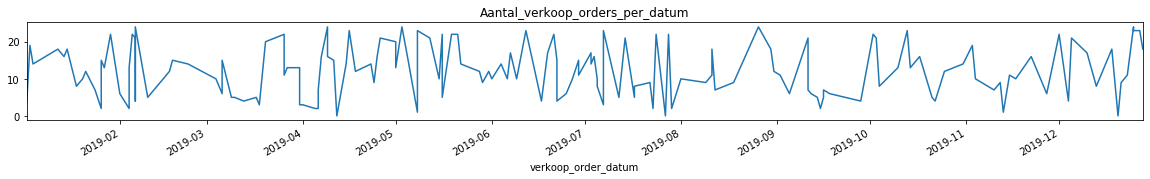

In [453]:
if show_intermediate_results == True:
    verkoop_order_df.plot(x='verkoop_order_datum', figsize=(20,2), legend=False, title='Aantal_verkoop_orders_per_datum', kind='line')

In [454]:
if show_intermediate_results == True:
#    verkoop_order_df.hist(column='klant_id', bins=10)
    fig=px.histogram(verkoop_order_df, x='verkoop_order_datum', nbins=12)
    fig.show()

In [31]:
if show_intermediate_results == True:
#    verkoop_order_df.hist(column='klant_id', bins=10)
    fig=px.histogram(verkoop_order_df, x='klant_id', nbins=10)
    fig.show()

In [32]:
verkoop_order_df['product_id'] = verkoop_order_df['verkoop_order_datum'].apply(lambda x: random.randint(0,3))


if show_intermediate_results == True:
    verkoop_order_df['product_id'].hist()

In [521]:
product_verkoop_prijs_S, product_verkoop_prijs_M, product_verkoop_prijs_L = random.randint(50, 80, size=(3,1))
ratio_kp = 0.6

product_data={
 0:{'name':'Robot arm (S)',
    'kostprijs':product_verkoop_prijs_S,
     'verkoopprijs':product_verkoop_prijs_S*ratio_kp},
 1:{'name':'Robot arm (M)',
    'kostprijs':product_verkoop_prijs_M,
     'verkoopprijs':product_verkoop_prijs_M*ratio_kp},
 2:{'name':'Robot arm (L)',
    'kostprijs':product_verkoop_prijs_L,
     'verkoopprijs':product_verkoop_prijs_L*ratio_kp},
}


product_df = pd.DataFrame.from_dict(product_data, orient='index').reset_index()
product_df.columns = ['product_id','product_naam','product_verkoop_prijs','product_kost_prijs']


product_df.index.rename('product_id', inplace=True)


if show_intermediate_results == True:
    
    print(product_df.head(10) )

            product_id   product_naam product_verkoop_prijs  \
product_id                                                    
0                    0  Robot arm (S)                  [77]   
1                    1  Robot arm (M)                  [50]   
2                    2  Robot arm (L)                  [65]   

              product_kost_prijs  
product_id                        
0           [46.199999999999996]  
1                         [30.0]  
2                         [39.0]  


In [592]:
def onderdelen():
    onderdeel_type=pd.DataFrame.from_dict({0:"Ruw Materiaal",\
                                           1:"Mechanisch",\
                                           2:"Electrisch"},\
                                         orient='index',\
                                         columns=['onderdeel_type_beschrijving'])
    onderdeel_type.index.rename('onderdeel_type_id', inplace=True)
    
    onderdelen=pd.DataFrame()
    columns=['onderdeel_id','onderdeel_naam','onderdeel_kostprijs','onderdeel_type']
    data= [[0,"Bout",0.002,1],
           [1,"Moer",0.002,1], 
           [2,"Schakelaar",0.002,2], 
           [3,"Sensor, controle",0.002,2], 
           [4,"Afdek kap",0.002,0], 
           [5,"Staal frame",0.002,0]
          ]
    onderdelen=pd.DataFrame(data=data, columns=columns)
    
    onderdelen=onderdelen.join(onderdeel_type, on='onderdeel_type')
    onderdelen.drop(columns=['onderdeel_type'], inplace=True)
    
    return onderdelen

if show_intermediate_results == True:
    print(onderdelen())

   onderdeel_id    onderdeel_naam  onderdeel_kostprijs  \
0             0              Bout                0.002   
1             1              Moer                0.002   
2             2        Schakelaar                0.002   
3             3  Sensor, controle                0.002   
4             4         Afdek kap                0.002   
5             5       Staal frame                0.002   

  onderdeel_type_beschrijving  
0                  Mechanisch  
1                  Mechanisch  
2                  Electrisch  
3                  Electrisch  
4               Ruw Materiaal  
5               Ruw Materiaal  


In [593]:
onderdelen=onderdelen()
onderdelen

,onderdeel_id,onderdeel_naam,onderdeel_kostprijs,onderdeel_type_beschrijving
0,0,Bout,0.002,Mechanisch
1,1,Moer,0.002,Mechanisch
2,2,Schakelaar,0.002,Electrisch
3,3,"Sensor, controle",0.002,Electrisch
4,4,Afdek kap,0.002,Ruw Materiaal
5,5,Staal frame,0.002,Ruw Materiaal


In [519]:
def bill_of_materials(product_df):
    BOM=[]
    
    return BOM

In [ ]:
        # Map products with a randaom amount of machines using both dataframes

        def product_machines_map(product_df, machine_df):
            dictionary={}
            inner_dict={}
            machine_types=machine_df.machine_type.unique()
            machine_types=list(machine_types)[::-1]
            machine_types=['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']
            print('\nHard code machine types and order: {}\n'.format(machine_types))
            product_ids=list(product_df.product_id.unique())
            step=0

            for prod_id in product_ids:
                low=random.randint(0,2)
                high=random.randint(3,6)
         #       print(high)
                for step in range(low,high):
                    inner_dict[step]=machine_types[step]

                dictionary[prod_id]=inner_dict
                inner_dict={}

            return dictionary

        if show_intermediate_results == True:
            print(product_machines_map(product_df, machine_df))

In [34]:
machine_data ={
    0:{'machine_type':'boor'},
    1:{'machine_type':'frees'},
    2:{'machine_type':'buig'},
    3:{'machine_type':'CNC'},
    4:{'machine_type':'snij'},
    5:{'machine_type':'boor'},
    6:{'machine_type':'stans'},
    7:{'machine_type':'CNC'},
    8:{'machine_type':'snij'},
    9:{'machine_type':'CNC'},
    10:{'machine_type':'CNC'},
    11:{'machine_type':'CNC'},
    12:{'machine_type':'boor'}    
    }
machine_df = pd.DataFrame.from_dict(machine_data, orient='index').reset_index()
machine_df.columns = ['machine_id','machine_type']


machine_df.index.rename('machine_id', inplace=True)


if show_intermediate_results == True:
    
    print(machine_df.head(10) )

In [455]:
# werkorder_df = pd.DataFrame(data=(random.randint(0,25, size=(n_verkoop_order_df, 2))), columns=['klant_id','verkoop_order_datum'])
werkorder_df = verkoop_order_df.copy()
werkorder_df.reset_index(inplace = True)
werkorder_df.index.rename('werkorder_id', inplace=True)
werkorder_df['werkorder_start_datum'] = werkorder_df['verkoop_order_datum'].apply(lambda x: x+timedelta(days=random.randint(0,2)))
werkorder_df['werkorder_eind_datum'] = werkorder_df['verkoop_order_datum'].apply(lambda x: x+timedelta(days=random.randint(3,10)))


werkorder_df.drop(['klant_id','verkoop_order_datum'], axis=1, inplace=True)

if show_intermediate_results == True:
    print('n_werkorder_df : {}\n'.format(len(werkorder_df)))
    print(werkorder_df.head(10))

n_werkorder_df : 158

              verkoop_order_id werkorder_start_datum werkorder_eind_datum
werkorder_id                                                             
0                            0            2019-01-03           2019-01-08
1                            1            2019-01-04           2019-01-12
2                            2            2019-01-04           2019-01-09
3                            3            2019-01-13           2019-01-18
4                            4            2019-01-15           2019-01-21
5                            5            2019-01-15           2019-01-22
6                            6            2019-01-18           2019-01-23
7                            7            2019-01-21           2019-01-24
8                            8            2019-01-21           2019-01-30
9                            9            2019-01-25           2019-02-02


In [313]:
# Map products with a randaom amount of machines using both dataframes

def product_machines_map(product_df, machine_df):
    dictionary={}
    inner_dict={}
    machine_types=machine_df.machine_type.unique()
    machine_types=list(machine_types)[::-1]
    machine_types=['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']
    print('\nHard code machine types and order: {}\n'.format(machine_types))
    product_ids=list(product_df.product_id.unique())
    step=0
    
    for prod_id in product_ids:
        low=random.randint(0,2)
        high=random.randint(3,6)
 #       print(high)
        for step in range(low,high):
            inner_dict[step]=machine_types[step]
            
        dictionary[prod_id]=inner_dict
        inner_dict={}
    
    return dictionary

if show_intermediate_results == True:
    print(product_machines_map(product_df, machine_df))


Hard code machine types and order: ['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']

{0: {1: 'snij', 2: 'buig', 3: 'frees', 4: 'CNC'}, 1: {0: 'stans', 1: 'snij', 2: 'buig'}, 2: {1: 'snij', 2: 'buig', 3: 'frees'}}


In [314]:
def zipper(l1, l2):
    return [list(l) for l in zip(l1, l2)]

In [315]:
def pick_random_machine(machine_type, machine_df):
    machine_id=0
    
    rand_pick=machine_df[machine_df['machine_type'] == machine_type]['machine_id']
    machine_id=rand_pick.iloc[random.randint(0, len(rand_pick))]
    
    return machine_id

# machine_df.sort_values('machine_type')

,machine_id,machine_type
machine_id,,
3,3,CNC
7,7,CNC
9,9,CNC
10,10,CNC
11,11,CNC
0,0,boor
5,5,boor
12,12,boor
2,2,buig


In [430]:
def bewerkingstijd(product_id, machine_id):
    bewerking_tijd = 1.3
    
    producten=list(product_df.index)
    machines=list(machine_df.index)
#    machines=list(machine_df.sort_values('machine_type').index)
    
#    matrix=random.randint(low=1, high=10, size=(len(producten), len(machines)))
    matrix=[[4, 9, 2, 9, 8, 8, 5, 15, 6, 12, 8, 6, 2],
            [3, 8, 1, 11, 5, 2, 4, 13, 3, 15, 6, 7, 2],
            [2, 6, 1, 12, 9, 7, 5, 16, 8, 16, 5, 4, 4]]
    
    df=pd.DataFrame(data=matrix, columns=machines)

    bewerking_tijd=df[machine_id].iloc[product_id]
    
    return round(bewerking_tijd)

if show_intermediate_results == True:
    n,i =(1,4)
    print('\nproduct_id: {}\t machine_id: {}\n'.format(list(product_df.index)[n], list(machine_df.index)[i]))
    print(bewerkingstijd(list(product_df.index)[n], list(machine_df.index)[i]))


product_id: 1	 machine_id: 4

5


In [431]:
def create_routes(werkorder_df, machine_df):
    columns=['werkorder_id','machine_id','step_id','bewerking_tijd']
    routes=pd.DataFrame(columns=columns)
    prod_machi_map=product_machines_map(product_df, machine_df)
    
    step=0
    machine='-'
    bewerking_tijd=1
    
    for wo in list(werkorder_df.index):
        
        # select a product_id for a given werkorder wo
        p=werkorder_df.iloc[wo]['product_id']
        
        # per step in the available steps/'keys' of a product
        for step in prod_machi_map[p].keys():
            
            # return the machine_id based on the machine_type
            machine=pick_random_machine(prod_machi_map[p][step], machine_df) 
            bewerking_tijd=bewerkingstijd(p,machine)
            routes=routes.append(dict(zipper(columns, [wo, machine, step, bewerking_tijd])), ignore_index=True)
    
    return routes
    
# df=create_routes(werkorder_df[:20], machine_df)
# df.head(20)

In [433]:
def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

In [432]:
route_df = create_routes(werkorder_df, machine_df)
route_df['bewerking_tijd_cumsum'] = route_df[['werkorder_id', 'step_id','bewerking_tijd']].groupby(['werkorder_id', 'step_id'], \
                                                     sort=True).sum().groupby(level=0).cumsum().reset_index(inplace=False)['bewerking_tijd']
route_df['bewerking_tijd_cumsum_timedelta'] = route_df['bewerking_tijd_cumsum'].apply(lambda x: x)

if show_intermediate_results == True:
    print(route_df.head(30))


Hard code machine types and order: ['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']

   werkorder_id machine_id step_id bewerking_tijd  bewerking_tijd_cumsum
0             0          8       1              8                      8
1             0          2       2              1                      9
2             0          1       3              1                     10
3             1          6       0              5                      5
4             1          8       1              6                     11
5             1          2       2              6                     17
6             1          1       3              9                     26
7             1         10       4              8                     34
8             2          4       1              9                      9
9             2          2       2              1                     10
10            2          1       3              1                     11
11            3          8       1   



		Werkorder doorloop tijd



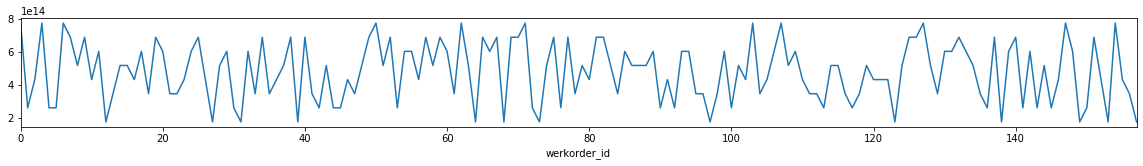

In [36]:
werkorder_df['werkorder_doorlooptijd'] = werkorder_df['werkorder_eind_datum']-werkorder_df['werkorder_start_datum']
werkorder_df['werkorder_maand_nummer'] = werkorder_df['werkorder_eind_datum'].apply(lambda x: x.isocalendar()[2])
werkorder_df['werkorder_doorlooptijd'].plot(figsize=(20,2))



print('\n\n\t\tWerkorder doorloop tijd\n')
#werkorder_df.drop(labels=['werkorder_doorlooptijd'], axis=1, inplace=True)

In [37]:
fig = px.line(werkorder_df.sort_values("werkorder_maand_nummer", ascending=False),  y="werkorder_doorlooptijd", color='werkorder_maand_nummer')
fig.show()

In [39]:
fig = px.line(werkorder_df.sort_values("werkorder_doorlooptijd", ascending=False),  y="werkorder_doorlooptijd", color='werkorder_maand_nummer')
fig.show()

In [40]:
klant__verkoop_order_df = klant_df.join(verkoop_order_df.set_index('klant_id'), lsuffix='le_', rsuffix='re_')

if show_intermediate_results == True:    
    print(klant__verkoop_order_df.head(8))

In [ ]:
def save_dateframes(dataframes_list):
    
    for df in dataframes_list:
        try:
            globals()[df].to_csv(path_or_buf=str(df)+'.csv', sep='|')
            globals()[df].to_csv(path_or_buf=str(df)+'.tsv', sep='\t')
        except:
            print('Failed to save {} to TSV file.'.format(df))

save_dateframes(dataframes_list)